In [1]:
# Source: http://archive.ics.uci.edu/ml/datasets/heart+disease

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# We'll need this packaged to display our model
from sklearn import tree

# Useful for displaying visualizations
from IPython.display import Image

# Packages for rendering our tree
import pydotplus
import graphviz

# Allows us to measure runtime
import time

# About the Data

Our dataset for this exercise was obtained from the UCI Machine Learning Repository, and we will be evaluating their heart disease dataset and for the purposes of this exercise, examine the sbujects from Cleveland, Ohio. Our dataset contains a list of 303 patients and a somewhat condensed dataset of columns detailing the patients' 
1. age, 
2. sex, 
3. cp (chest pain type) [1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic]
4. trestbps (blood pressure in mm Hg)
5. chol (serum cholesterol in mg/dl)
6. fbs (fasting blood sugar > 120 mg/dl) [0 or 1]
7. restecg (resting electrocardiographic results) [0 = normal, 1 = abnormal, 2 = probable ventricular hypertophy]
8. thalach (maximum heart rate)
9. exang (exercise induced angina) [1 = yes, 0 = no]
10. oldpeak (ST depression induced by exercise relative to rest)
11. slop (slope: the slope of the peak exercise ST segment) [1 = upslope, 2 = flat, 3 = downslope]
12. ca (number of major vessels (0-3) colored by flourosopy)
13. thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. num (diagnosis of heart disease [0(mild)-4(severe)]

In [3]:
# Importing our data
data = pd.read_csv('Data\\processed.cleveland.data', delimiter=',', header =None, encoding ='latin8')
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = data[data.ca != '?']
data = data[data.thal != '?']

# Creating a separate dataframe for our target variable
Y = pd.DataFrame()
Y['condition'] = data['num']
data.drop(['num'], axis = 1, inplace = True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


# Decision Tree

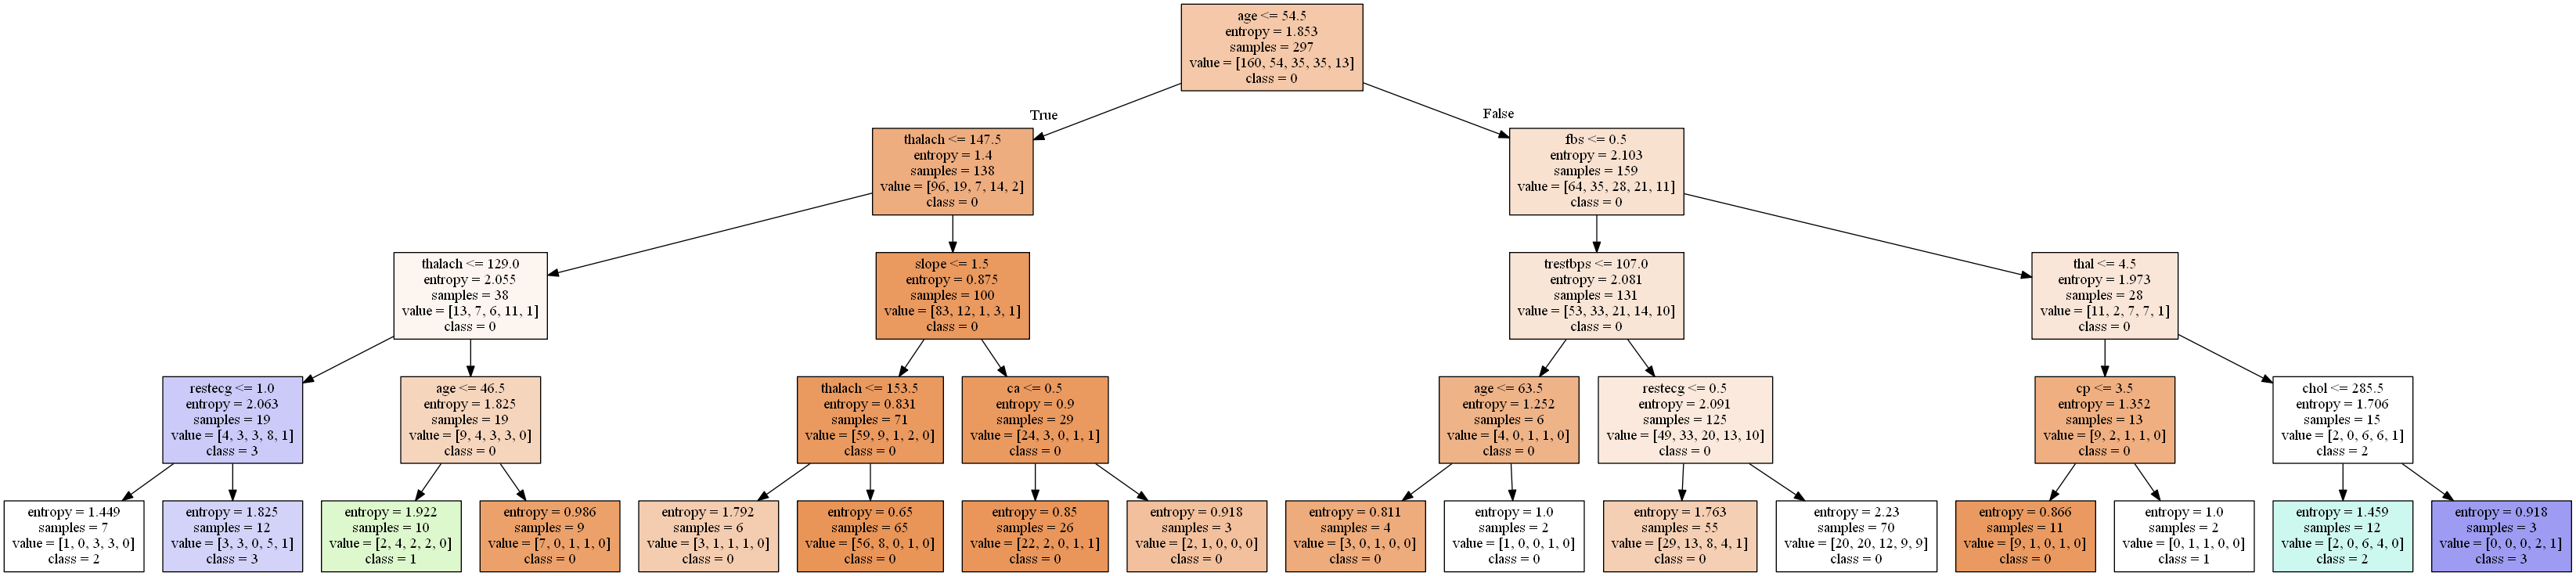

In [21]:
start_time = time.time()

# constructing the shape of our decision tree
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(data, Y)

# visualizing our decision tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=data.columns,
    class_names = ['0', '1','2','3','4'],
    filled = True
)

runtime = str((time.time() - start_time)) + 'seconds;'

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [22]:
runtime

'0.005957841873168945seconds;'

By creating a simple random tree with every feature in our dataset above, we may have constructed a decision tree, but it doesn't really tell us very much since all but one of the terminal nodes represent the class, 0, the least at risk for heart disease. While we have 5 classes for diagnosis, we only find one terminal node that represents a diagnosis with a class of 3. The other classes are less common, but we'll need to manipulate our dataset so that they will occur in our decision tree.

# Simple Random Forest

In [6]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = data
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

array([0.5625    , 0.53125   , 0.59375   , 0.5483871 , 0.63333333,
       0.64285714, 0.46428571, 0.67857143, 0.64285714, 0.57142857])

In [7]:
# Create correlation matrix with the  columns
correlation_matrix = X.corr()
display(correlation_matrix)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,-0.376277,0.171946,0.222475,0.159356,-0.130333,0.059732,0.103792
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,-0.113376,0.104641,-0.015456,0.070798,-0.390730,0.145368,0.327671
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,-0.223789,0.082122,0.125435,0.137179,-0.266787,0.046169,0.249735
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,-0.047292,-0.061574,0.086767,0.078892,-0.143474,0.075211,0.109624
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,-0.089797,0.007881,0.052369,0.093691,0.001379,-0.099575,0.047368
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,-0.120283,-0.009506,0.128859,0.080348,-0.072045,0.096002,0.026522
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,-0.119846,0.050987,0.041893,0.095598,-0.023504,0.043483,0.002695
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,0.293299,-0.196607,-0.056676,-0.176564,0.286684,-0.160679,-0.213956
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,-0.201556,0.152302,0.098640,0.013408,-0.325755,0.063827,0.301283
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,-0.224689,-0.018964,0.214636,0.186832,-0.347874,0.101819,0.305253


# Kbest

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest().fit(data,Y)
result_kb = pd.DataFrame(kbest.score_func(X,Y)[1], index=X.columns)
result_kb[0].sort_values().head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


thal_3.0    1.379222e-21
ca_0.0      1.844058e-18
oldpeak     4.358397e-18
thal_7.0    6.449771e-18
thalach     2.912311e-14
exang       4.676316e-13
cp          1.848086e-12
slope       2.944479e-09
ca_2.0      2.616952e-08
ca_3.0      1.367482e-06
Name: 0, dtype: float64

In [9]:
result_kb

,0
age,7.692129e-04
sex,8.472919e-05
cp,1.848086e-12
trestbps,8.781372e-02
chol,4.814080e-01
fbs,9.435051e-02
restecg,9.990491e-03
thalach,2.912311e-14
exang,4.676316e-13
oldpeak,4.358397e-18


# PCA Decision Tree

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=4)
X = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
X = principalDf
Y = Y.values.reshape(-1, 1)

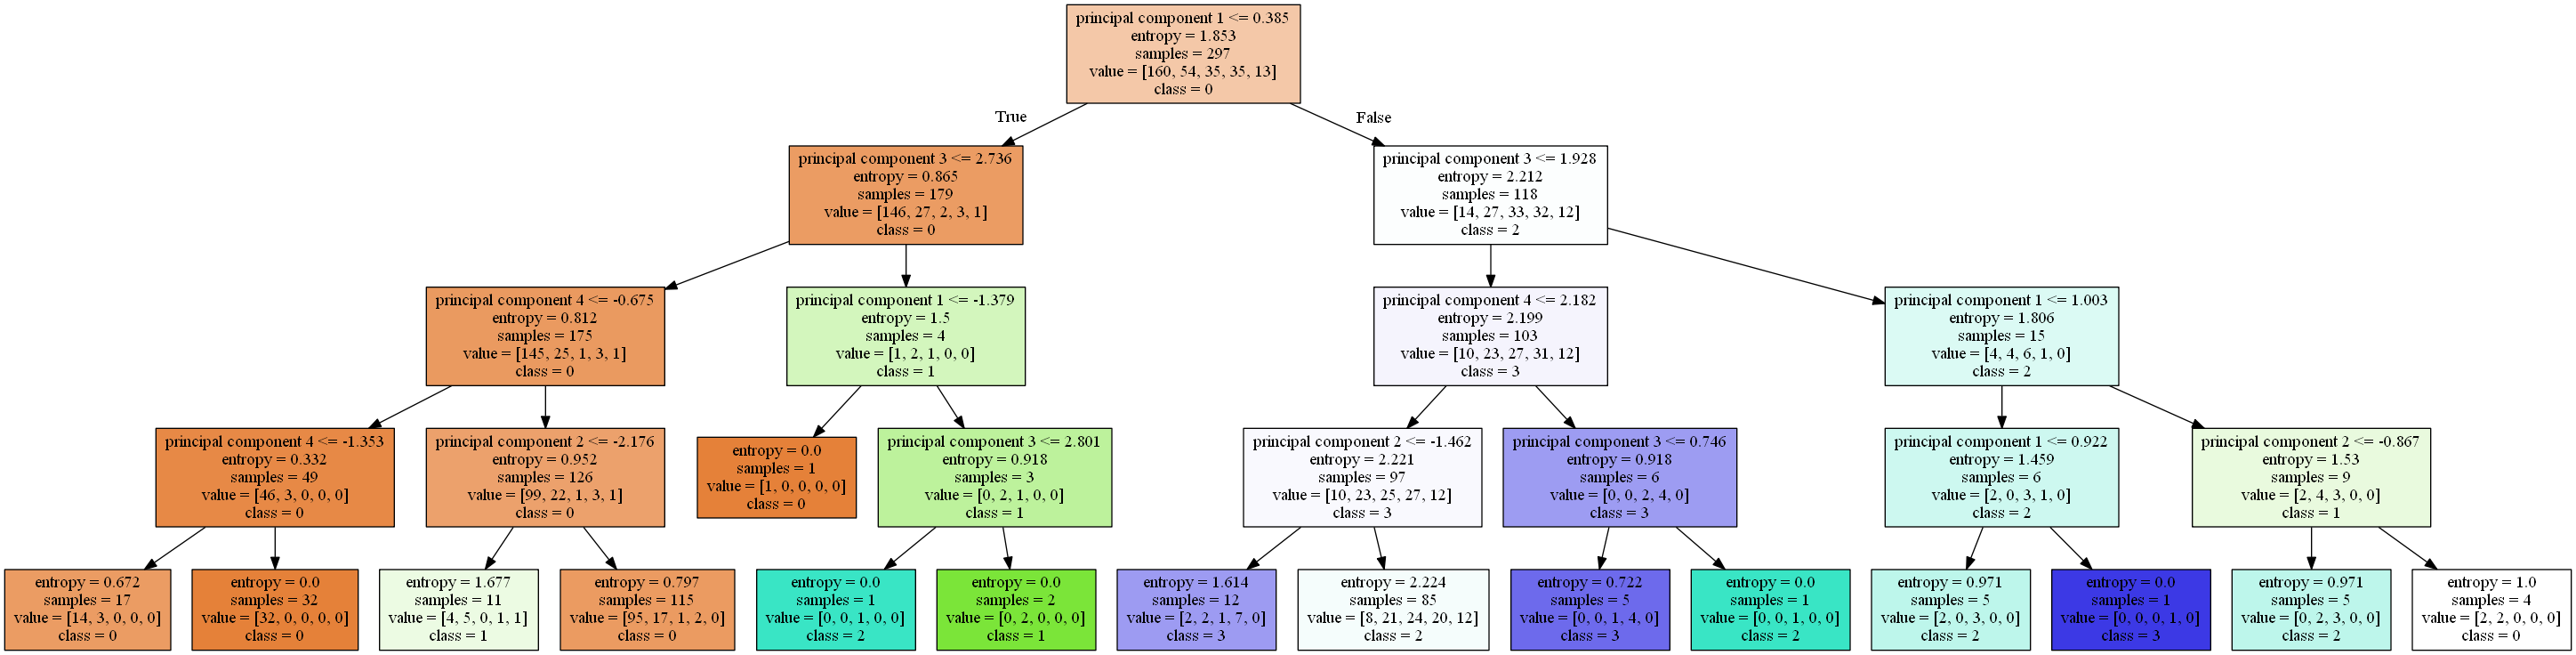

In [12]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=X.columns,
    class_names = ['0', '1','2','3','4'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

By performing PCA on our dataset, and condesning our dataset from 13 variables down to 4, we are able to construct a much smaller, quicker, and more useful decision tree. In our first decision tree, we were able to oberve that class 0 is the most common, with 3 of the classes not appearing in our tree at all. For this decision tree, we revised the dataset to focus on the underrepresented groups to paint a clearer iullustration on what factors make it more probable to fall under the more severe categories.